In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F    # torch.nn.functional provides some useful functions like relu, softmax, etc.

In [2]:
# Create a Model Class that inherits from nn.Module
class Model(nn.Module):
    def __init__(self, input_features = 4, hidden_layer1 = 8, hidden_layer2 = 9, output_features = 3):
        super().__init__() #super() is used to call the __init__ method of the parent class
        self.fc1 = nn.Linear(input_features, hidden_layer1)  # fc1 = fully connected layer 1
        self.fc2 = nn.Linear(hidden_layer1, hidden_layer2) # fc2 = fully connected layer 2
        self.output = nn.Linear(hidden_layer2, output_features) # output = fully connected output layer
    
    def forward(self, x):
        x = F.relu(self.fc1(x)) 
        x = F.relu(self.fc2(x))
        x = self.output(x)
        return x

# Create an instance of the Model Class
model = Model()

IMPORT OUR DATASET

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Load the IRIS dataset
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
df = pd.read_csv(url)
df.head(100)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Versicolor
96,5.7,2.9,4.2,1.3,Versicolor
97,6.2,2.9,4.3,1.3,Versicolor
98,5.1,2.5,3.0,1.1,Versicolor


In [5]:
print(df['variety'].unique())

['Setosa' 'Versicolor' 'Virginica']


In [6]:
# Replace the variety names with numbers
df['variety'] = df['variety'].replace({'Setosa': 0.0, 'Versicolor': 1.0, 'Virginica': 2.0})
df.head(100)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1.0
96,5.7,2.9,4.2,1.3,1.0
97,6.2,2.9,4.3,1.3,1.0
98,5.1,2.5,3.0,1.1,1.0


In [7]:
# Split X and y

'''
In pandas, the `drop` function is used to remove rows or columns. 
The `axis` parameter determines whether you're dropping a row or a column:

- `axis = 0` or `axis = 'index'`: This will drop rows which match the given index.
- `axis = 1` or `axis = 'columns'`: This will drop the column matching the given label.

'''

X = df.drop('variety', axis = 1) 
y = df['variety'] 

# Convert them to numpy arrays
X = X.values
y = y.values

X, y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

We can perform a train-test split on tensors. However, the popular `train_test_split` function from `sklearn.model_selection` works with arrays and not directly with tensors.

In [10]:
# We need to convert the data to PyTorch tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [11]:
# Set the criterion of our model to measure our error
loss_funct = nn.CrossEntropyLoss()

# Choose the Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01) # We will use the Adam Optimizer and a learning rate of 0.01

In [12]:
# Check my model's parameters
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (output): Linear(in_features=9, out_features=3, bias=True)
)>

In [13]:
# Train the model

epochs = 100
losses = [] # We need to keep track of the losses to know that our model is learning

for i in range(epochs):
    # Forward and get a prediction
    y_pred = model.forward(X_train)
    
    # Calculate the loss
    loss = loss_funct(y_pred, y_train) # y_train is the true value (target value)
    
    # Keep track of the loss
    losses.append(loss.detach().numpy()) # We use detach() to get the value of the loss and not the tensor
    
    # Print the loss every 10 epochs
    if i % 10 == 0:
        print(f'Epoch {i} and loss is: {loss}')
        
    # Backpropagation
    optimizer.zero_grad() # Zero the gradients (before backpropagation) for the variables it will update
    loss.backward() # Backpropagation
    optimizer.step() # Update the weights



Epoch 0 and loss is: 1.052533507347107


c:\Users\Stelios_Ntanavaras\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\autograd\__init__.py:251: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ..\c10\cuda\CUDAFunctions.cpp:108.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch 10 and loss is: 0.7521054148674011
Epoch 20 and loss is: 0.4524995684623718
Epoch 30 and loss is: 0.3137616515159607
Epoch 40 and loss is: 0.1976708024740219
Epoch 50 and loss is: 0.11419840902090073
Epoch 60 and loss is: 0.07437365502119064
Epoch 70 and loss is: 0.054669857025146484
Epoch 80 and loss is: 0.043054141104221344
Epoch 90 and loss is: 0.03567546606063843


Text(0.5, 0, 'Epoch')

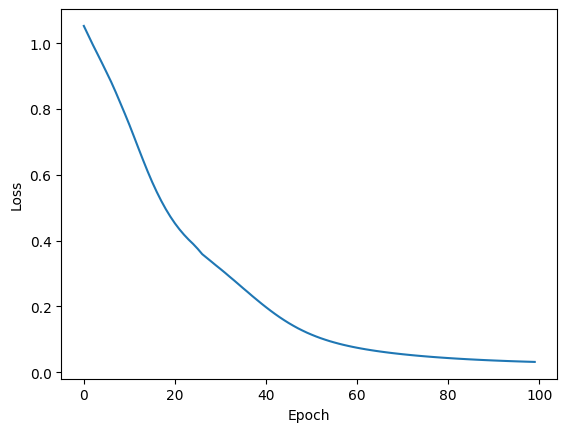

In [14]:
# Plot the loss
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [15]:
# Evaluation
# We need to evaluate the model on the test set to see how well it performs on unseen data

with torch.no_grad(): # Basically turn off backpropagation. We don't need gradients for the evaluation
    y_eval = model.forward(X_test) # Get the predictions
    loss = loss_funct(y_eval, y_test) # Calculate the loss
    print(f'Loss: {loss}')
    

Loss: 0.15101411938667297


In [19]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)
        
        # Will tell use what type of flower class out network thinks it is
        print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')
        
        # Correct or not
        if y_val.argmax().item() == y_test[i]:
            correct += 1
            
print(f'We got {correct} correct!')

1.) tensor([-8.8060,  3.3311,  7.6803]) 	 2 	 2
2.) tensor([-12.2720,   2.4837,  12.1299]) 	 2 	 2
3.) tensor([-12.4589,   3.4306,  11.6076]) 	 2 	 2
4.) tensor([-3.6609,  5.5554,  0.0691]) 	 1 	 1
5.) tensor([-10.2702,   3.5654,   9.0291]) 	 2 	 2
6.) tensor([-0.8204,  6.3649, -3.8673]) 	 1 	 1
7.) tensor([-7.5801,  4.0888,  5.6481]) 	 2 	 2
8.) tensor([-3.1390,  5.7566, -0.7384]) 	 1 	 1
9.) tensor([-8.8425,  3.8628,  7.1927]) 	 2 	 2
10.) tensor([-12.8042,   2.7053,  12.4992]) 	 2 	 2
11.) tensor([-7.1666,  4.2047,  5.0408]) 	 2 	 2
12.) tensor([ 10.7379,   3.8104, -20.4522]) 	 0 	 0
13.) tensor([  9.5725,   3.4254, -18.1645]) 	 0 	 0
14.) tensor([ 0.3310,  5.4567, -4.7558]) 	 1 	 1
15.) tensor([  9.6264,   4.0901, -18.6579]) 	 0 	 0
16.) tensor([-6.9650,  4.4498,  4.6621]) 	 2 	 2
17.) tensor([  9.7700,   3.7286, -18.7070]) 	 0 	 0
18.) tensor([-8.3880,  3.6511,  6.8825]) 	 1 	 2
19.) tensor([ 10.9744,   3.7252, -20.8141]) 	 0 	 0
20.) tensor([  8.5282,   3.3792, -16.3151]) 	 0 	 0